In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [4]:
files = glob.glob('../Output/RF/*.csv')
files.sort()
files.append(files.pop(files.index('../Output/RF/Clustering_fit_time.csv')))

In [5]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/RF/BreastC Silhouette.csv',
 1: '../Output/RF/BreastC acc.csv',
 2: '../Output/RF/BreastC adjMI.csv',
 3: '../Output/RF/BreastC2D.csv',
 4: '../Output/RF/CreditCardF Silhouette.csv',
 5: '../Output/RF/CreditCardF acc.csv',
 6: '../Output/RF/CreditCardF adjMI.csv',
 7: '../Output/RF/CreditCardF2D.csv',
 8: '../Output/RF/SSE.csv',
 9: '../Output/RF/logliklihood.csv',
 10: '../Output/RF/Clustering_fit_time.csv'}

In [6]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [7]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_ari = dfs[1].T[1:]
bc_NMI = dfs[2].T[1:]
bc_2d = dfs[3]

ccf_ss = dfs[4].T[1:]
ccf_ari = dfs[5].T[1:]
ccf_NMI = dfs[6].T[1:]
ccf_2d = dfs[7]

In [8]:
time_file="../Clustering_fit_time_RF.csv"
dfs[10]=pd.read_csv(time_file)
print(dfs[10].head(10))

   Unnamed: 0   k  BC_kmean     BC_em  CCF_kmean    CCF_em
0           0   2  0.169786  0.005654   0.034997  0.007899
1           1   3  0.022186  0.005410   0.038794  0.039865
2           2   4  0.270374  0.024462   0.053499  0.073428
3           3   5  0.212902  0.011885   0.071011  0.048087
4           4   6  0.192715  0.020876   0.061495  0.037837
5           5   7  0.234685  0.028040   0.073128  0.179887
6           6   8  0.188381  0.030916   0.084032  0.118918
7           7   9  0.159841  0.031960   0.084539  0.146459
8           8  10  0.241841  0.039114   0.073347  0.208875


In [9]:
fit_time=dfs[10]
fit_time.columns=["k","BC_kmean","BC_EM", "CCF_kmean", "CCF_EM"]
bc_kmean_fit_time= fit_time["BC_kmean"]
bc_em_fit_time= fit_time["BC_EM"]
ccf_kmean_fit_time= fit_time["CCF_kmean"]
ccf_em_fit_time= fit_time["CCF_EM"]
cluster_number= fit_time["k"]

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [ ]:
plt.plot(cluster_number,bc_kmean_fit_time, color="green", label= "k-means")
plt.plot(cluster_number,bc_em_fit_time, color="red", label="EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Breast Cancer RF - Clustering Fit Time')
plt.savefig('Breast Cancer RF - Clustering Fit Time')

plt.show()

In [ ]:
plt.plot(cluster_number,ccf_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,ccf_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Credit Card Fraud RF- Clustering Fit Time')
plt.savefig('Credit Card Fraud RF - Clustering Fit Time')

plt.show()

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [ ]:
km_SSE.columns = ['clusters','ccf_sse','bc_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
ccf_y = km_SSE['ccf_sse']
km_SSE.head()

In [ ]:
plt.plot(x,bc_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - K-Means SSE')
plt.savefig('Breast Cancer RF - K-Means SSE')
plt.show()

In [ ]:
plt.plot(x,ccf_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RF - K-Means SSE')
plt.savefig('Credit Card Fraud RF - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [ ]:
gmm_log.columns = ['clusters',"ccf_log",'bc_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
ccf_y = gmm_log['ccf_log']
gmm_log.head()

In [ ]:
plt.plot(x,bc_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - EM Log-Likelihood')
plt.savefig('Breast Cancer RF - EM Log-Likelihood')
plt.show()

In [ ]:
plt.plot(x,ccf_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RF - EM Log-Likelihood')
plt.savefig('Credit Card Fraud RF - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [ ]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

In [ ]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Silhouette Score')
plt.legend()
plt.savefig('Breast Cancer RF - Silhouette Score')
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [ ]:
bc_ari['clusters'] = bc_ari.index
bc_ari.columns = ['gmm_ari','km_ari','clusters']
x = bc_ari['clusters']
gmm_y = bc_ari['gmm_ari']
km_y = bc_ari['km_ari']
bc_ari.head()

In [ ]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Adjusted Rand Index')
plt.legend()
plt.savefig('Breast Cancer RF - Adjusted Rand Index')
plt.show()

## Adjusted MI: K-Means and EM

In [ ]:
bc_NMI['clusters'] = bc_NMI.index
bc_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = bc_NMI['clusters']
gmm_y = bc_NMI['gmm_NMI']
km_y = bc_NMI['km_NMI']

In [ ]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Normalized Mutual Information')
plt.legend()
plt.savefig('Breast Cancer RF -  Normalized Mutual Information')
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [ ]:
ccf_ss['clusters'] = bc_ss.index
ccf_ss.columns = ['gmm_ss','km_ss','clusters']
x = ccf_ss['clusters']
gmm_y = ccf_ss['gmm_ss']
km_y = ccf_ss['km_ss']
ccf_ss.head()

In [ ]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RF - Silhouette Score')
plt.legend()
plt.savefig('Credit Card Fraud RF - Silhouette Score')
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [ ]:
ccf_ari['clusters'] = ccf_ari.index
ccf_ari.columns = ['gmm_ari','km_ari','clusters']
x = ccf_ari['clusters']
gmm_y = ccf_ari['gmm_ari']
km_y = ccf_ari['km_ari']
ccf_ari.head()

In [ ]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RF -Adjusted Rand Index')
plt.legend()
plt.savefig('Credit Card Fraud RF - Adjusted Rand Index')
plt.show()

## Adjusted MI: K-Means and EM

In [ ]:
ccf_NMI['clusters'] = ccf_NMI.index
ccf_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = ccf_NMI['clusters']
gmm_y = ccf_NMI['gmm_NMI']
km_y = ccf_NMI['km_NMI']

In [ ]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RF - Normalized Mutual Information')
plt.legend()
plt.savefig('Credit Card Fraud RF - Normalized Mutual Information')
plt.show()

## 2D Visualizaion

In [ ]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

## RF Analyses

In [10]:
files1 = glob.glob('../Output/RF/RF/*scree.csv')
files1.sort()

In [11]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/RF/RF/bc scree.csv', 1: '../Output/RF/RF/ccf scree.csv'}

In [17]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Features","Gini Importance"])

In [18]:
bc_scree = dfs1[0][1:17]
ccf_scree = dfs1[1][1:17]

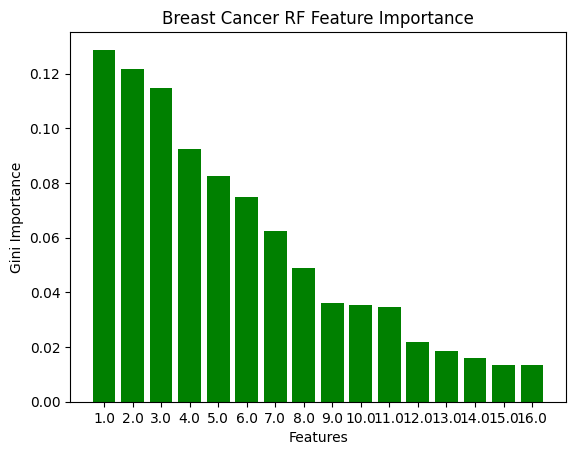

In [19]:
height = bc_scree["Gini Importance"]
bars = bc_scree["Features"]
y_pos = np.arange(len(bars))
plt.ylabel("Gini Importance")
plt.xlabel("Features")
plt.title('Breast Cancer RF Feature Importance')
plt.bar(y_pos,height, color="green")
plt.xticks(y_pos, bars)
plt.savefig('Breast Cancer RF Feature Importance')


plt.show()

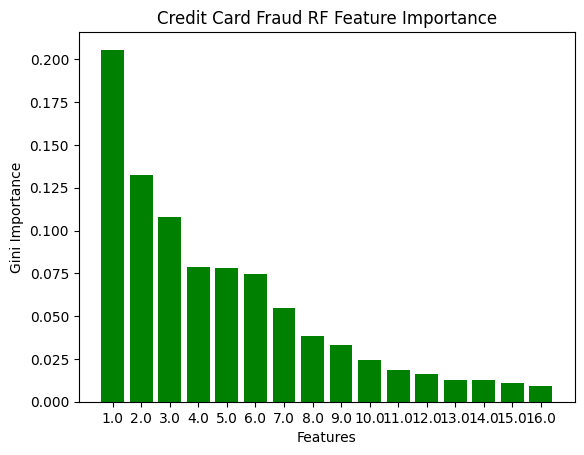

In [20]:
height = ccf_scree["Gini Importance"]
bars = ccf_scree["Features"]
y_pos = np.arange(len(bars))
plt.ylabel("Gini Importance")
plt.xlabel("Features")
plt.title('Credit Card Fraud RF Feature Importance')
plt.bar(y_pos,height, color="green")
plt.xticks(y_pos, bars)
plt.savefig('Credit Card Fraud RF Feature Importance')
plt.show()